In [0]:
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

### Gaussian Distributed Data fits better to Gaussian Naive Bayesian rather than Logistic Regression, unfortunately that is not the case most of the time.
Now, imagine we have two artificial dataset. Both are drawn from Gaussian distribution. One of the dataset is with standard deviation 1 and the other is 5. Each cluster is conditionally independent from each other.

make_blobs function samples data points from gaussian distribution.

In [0]:
from sklearn.datasets import make_blobs
data1, label1 =make_blobs(n_samples=500, centers=2, n_features=2, cluster_std=1, random_state=1)
data2, label2 =make_blobs(n_samples=500, centers=2, n_features=2, cluster_std=5, random_state=1)


Let's split the datasets into train and test.

In [0]:
x_train1,x_test1,y_train1, y_test1= train_test_split(data1,label1,test_size=0.3)
x_train2,x_test2,y_train2, y_test2 = train_test_split(data2,label2,test_size=0.3)

Plot the first dataset with standard deviation 1.

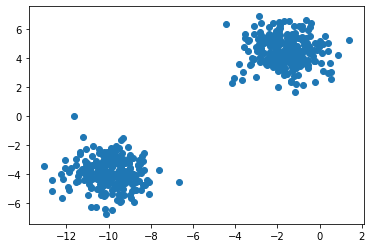

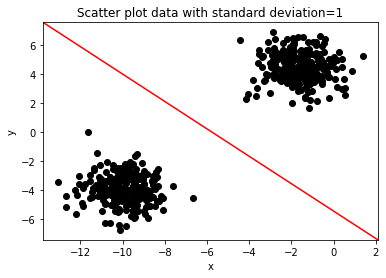

In [0]:
import matplotlib.lines as mlines
plt.scatter(data1[:,0], data1[:,1])
fig, ax = plt.subplots()
ax.scatter(data1[:,0],  data1[:,1], c='black')
plt.title('Scatter plot data with standard deviation=1')
line = mlines.Line2D([0, 1], [1,0 ], color='red')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Plot the first dataset with standard deviation 5.

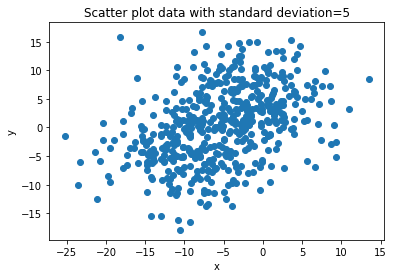

In [0]:
plt.scatter(data2[:,0], data2[:,1])
plt.title('Scatter plot data with standard deviation=5')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Train a Gaussian Naive Bayesian and Logistic Regression with the 1st dataset.

In [0]:
gnb = GaussianNB()
gnb.fit(x_train1, y_train1)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
clf = LogisticRegression(random_state=0)
clf.fit(x_train1, y_train1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Perfect Decision Boundary

In [0]:
# Predict
print("Classification Report for Naive Bayesian with stddev=1:")
print(classification_report(gnb.predict(x_test1),y_test1))

Classification Report for Naive Bayesian with stddev=1:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        74
           1       1.00      1.00      1.00        76

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



In [0]:
# Predict
print("Classification Report for Logistic Regression with stddev=1:")
print(classification_report(clf.predict(x_test1),y_test1))

Classification Report for Logistic Regression with stddev=1:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        74
           1       1.00      1.00      1.00        76

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



### Both algorithm perfectly separate two data clusters for 1st dataset with standard deviation 1. The data points are linearly separable.

In [0]:
gnb2 = GaussianNB()
gnb2.fit(x_train2, y_train2)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
clf2 = LogisticRegression(random_state=0)
clf2.fit(x_train2, y_train2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# Predict
print("Classification Report for Naive Bayesian with stddev=5:")
print(classification_report(gnb2.predict(x_test2),y_test2))

Classification Report for Naive Bayesian with stddev=5:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91        75
           1       0.92      0.89      0.91        75

    accuracy                           0.91       150
   macro avg       0.91      0.91      0.91       150
weighted avg       0.91      0.91      0.91       150



In [0]:
# Predict
print("Classification Report for Logistic Regression with stddev=5:")
print(classification_report(clf2.predict(x_test2),y_test2))

Classification Report for Logistic Regression with stddev=5:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90        74
           1       0.92      0.88      0.90        76

    accuracy                           0.90       150
   macro avg       0.90      0.90      0.90       150
weighted avg       0.90      0.90      0.90       150



### Use the scatter plot and draw the perfect decision boundary on two scatter plot. Discuss what is linear separability, decision boundary, which datapoints are harder to separate. Discuss the accuries and the why which model performs better.
 

### Please also read: [Equivalence of GNB and LR](https://appliedmachinelearning.blog/2019/09/30/equivalence-of-gaussian-naive-bayes-and-logistic-regression-an-explanation/)

# [75pts] Logistic Regression and Naive Bayesian Comparison

### The dataset
We will use Kaggle dataset. This dataset contains around 200k news headlines from the year 2012 to 2018 obtained from HuffPost.

You can [download.](https://www.kaggle.com/rmisra/news-category-dataset)

In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [0]:
from google.colab import drive
drive.mount("/content/gdrive")

In [0]:
import codecs
df=pd.read_json('/content/drive/My Drive/News_Category_Dataset_v2.json',lines= True)
df.head()

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26


## Select 4 categories: Politics, Wellness, Entertainment, Travel

use only 50K of data row

In [0]:
df = df.sample(50000)

In [0]:
new_df = df[(df['category']== 'POLITICS') | (df['category']== 'WELLNESS') | (df['category']== 'ENTERTAINMENT') | (df['category']== 'TRAVEL')]
new_df

,category,headline,authors,link,short_description,date
83422,POLITICS,Watch The Ferguson Protests Unfold On Social M...,"Dhyana Taylor, Dayana Morales Gomez, Jacob Ker...",https://www.huffingtonpost.com/entry/ferguson-...,How #Ferguson became #HandsUpDontShoot.,2015-08-09
123919,ENTERTAINMENT,The Evolution of Bassist Erik Scott: From Alic...,"Lorraine Devon Wilke, ContributorSass & Sensib...",https://www.huffingtonpost.com/entry/the-evolu...,"There's a classic saying that goes, ""An old mu...",2014-05-01
16250,POLITICS,It's The Obama Boom. Don't Let Trump Forget It.,"Ian Reifowitz, ContributorProfessor of History...",https://www.huffingtonpost.com/entry/its-the-o...,The U.S. economy is working better for average...,2017-09-18
111974,POLITICS,Congress Beware: The 2001 AUMF Could Become Pe...,"Shoon Murray, ContributorAssociate Professor, ...",https://www.huffingtonpost.com/entry/congress-...,Congress did not intend for the 2001 AUMF to b...,2014-09-15
46992,ENTERTAINMENT,That Crazy Tortoise Story On 'Transparent' Act...,Sara Boboltz,https://www.huffingtonpost.com/entry/that-craz...,Nacho has a real-life counterpart.,2016-09-26
...,...,...,...,...,...,...
11602,POLITICS,Revenge Is A Rotten Way To Run A Country,"Michael Winship, ContributorFormer senior writ...",https://www.huffingtonpost.com/entry/revenge-i...,"Looking back at the last tumultuous year, to m...",2017-11-16
195964,WELLNESS,Now I Lay Me Down to Text,"Linda Kaplan Thaler, Contributor\nLinda Kaplan...",https://www.huffingtonpost.com/entry/americans...,As one of the many millions of over-programmed...,2012-03-21
6824,POLITICS,GOP Senate Candidate Courtland Sykes Lashes Ou...,Mary Papenfuss,https://www.huffingtonpost.com/entry/courtland...,"""Men and women are different and gender-bendin...",2018-01-26
22146,POLITICS,The Bad News From Hamburg: Nobody Is Leading T...,Howard Fineman,https://www.huffingtonpost.com/entry/trump-g-2...,Certainly not Donald Trump.,2017-07-06


In [0]:
new_df['category'].value_counts()

POLITICS         8060
WELLNESS         4387
ENTERTAINMENT    4055
TRAVEL           2538
Name: category, dtype: int64

Convert category names to digit labelling

In [0]:
y = (new_df['category'].to_numpy() == "WELLNESS")*1 + (new_df['category'].to_numpy() == "ENTERTAINMENT")*2 + (new_df['category'].to_numpy() == "TRAVEL")*3
y.shape


(19040,)

Merge headlines with short descriptions

In [0]:
X = new_df['short_description'] + ' '+ new_df['headline']
X.head

<bound method NDFrame.head of 83422     How #Ferguson became #HandsUpDontShoot. Watch ...
123919    There's a classic saying that goes, "An old mu...
16250     The U.S. economy is working better for average...
111974    Congress did not intend for the 2001 AUMF to b...
46992     Nacho has a real-life counterpart. That Crazy ...
                                ...                        
11602     Looking back at the last tumultuous year, to m...
195964    As one of the many millions of over-programmed...
6824      "Men and women are different and gender-bendin...
22146     Certainly not Donald Trump. The Bad News From ...
108328     White House Pressures States To Reverse Manda...
Length: 19040, dtype: object>

### Create Tf-Idf model

In [0]:
from sklearn.feature_extraction.text import CountVectorizer


count_vect = CountVectorizer(lowercase=True, stop_words='english')
X_train_counts = count_vect.fit_transform(X)
print(X_train_counts)


  (0, 10054)	2
  (0, 12032)	1
  (0, 28977)	1
  (0, 20969)	1
  (0, 27941)	1
  (0, 24767)	1
  (0, 16622)	1
  (1, 5167)	1
  (1, 23356)	1
  (1, 11433)	1
  (1, 18524)	2
  (1, 17599)	2
  (1, 7649)	1
  (1, 14469)	1
  (1, 3151)	2
  (1, 10162)	1
  (1, 29396)	1
  (1, 1731)	1
  (1, 1686)	2
  (1, 8181)	1
  (1, 14818)	1
  (1, 9251)	2
  (1, 23516)	2
  (1, 1696)	1
  (1, 21870)	1
  :	:
  (19037, 8422)	1
  (19037, 11483)	1
  (19037, 640)	1
  (19037, 17914)	1
  (19037, 2853)	1
  (19037, 6320)	1
  (19037, 26235)	1
  (19037, 16199)	1
  (19038, 29498)	1
  (19038, 27526)	1
  (19038, 8182)	1
  (19038, 17982)	1
  (19038, 4670)	1
  (19038, 2365)	1
  (19038, 15194)	1
  (19038, 11983)	1
  (19039, 18699)	1
  (19039, 12777)	1
  (19039, 29199)	1
  (19039, 22532)	1
  (19039, 25367)	1
  (19039, 16155)	1
  (19039, 8637)	1
  (19039, 21254)	1
  (19039, 20623)	1


In [0]:
from sklearn.feature_extraction.text import TfidfTransformer


tfidf_transformer = TfidfTransformer()
X_train_tf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tf 

<19040x29850 sparse matrix of type '<class 'numpy.float64'>'
	with 289069 stored elements in Compressed Sparse Row format>

Split train and test data

In [0]:
from sklearn.model_selection import train_test_split
x_train3, x_test3, y_train3, y_test3 = train_test_split(X_train_tf  ,y, test_size=0.2, random_state = 0)

### Gaussian Naive Bayesian

In [0]:
from timeit import default_timer as timer

start = timer()
gnb3 = GaussianNB()
gnb3.fit(x_train3.toarray(), y_train3)
end = timer()

print(end - start)

11.089362397000514


In [0]:
# Predict
print("Classification Report for Naive Bayesian:")
print(classification_report(gnb3.predict(x_test3.toarray()),y_test3))

Classification Report for Naive Bayesian:
              precision    recall  f1-score   support

           0       0.75      0.78      0.77      1531
           1       0.68      0.71      0.69       854
           2       0.67      0.63      0.65       852
           3       0.64      0.58      0.61       571

    accuracy                           0.70      3808
   macro avg       0.69      0.68      0.68      3808
weighted avg       0.70      0.70      0.70      3808



### 6) Logistic Regression

In [0]:
from timeit import default_timer as timer

start = timer()
clf3 = LogisticRegression(random_state=0)
clf3.fit(x_train3.toarray(), y_train3)
end = timer()

print(end - start)

110.78253609500098


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [0]:
# Predict
print("Classification Report for Logistic Regression:")
print(classification_report(clf3.predict(x_test3),y_test3))


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      1709
           1       0.90      0.88      0.89       921
           2       0.85      0.87      0.86       783
           3       0.71      0.92      0.80       395

    accuracy                           0.89      3808
   macro avg       0.85      0.89      0.87      3808
weighted avg       0.89      0.89      0.89      3808



### Observe Logistic Regression is much slower but more accurate. Discuss.
---

We evaluated the performance of Logistic Regression and Bayes classifiers (Gaussian Naïve Bayes and Gaussian Bayes with general and shared covariance matrices) on the 4 topics of news dataset.

* We have obtained better results with Logistic 
Regression as ***Accuracy score = 0.89***

* While in Naive Bayesian we have obtained ***Accucary score = 0.70***

We can see in Logistic Regression recall values are much higher than they are in Naive Bayes.(0.89 vs 0.70)
Which also indicates that Logistic Regression worked better in this dataset.

•	In Naive Bayes we assume that all of our features are independent. If they are really independent, we overcounting some of these data. Because of the overcounting, Naive Bayesian classifier is getting less accurate.

It is also shown in the [*paper*](https://http://ai.stanford.edu/~ang/papers/nips01-discriminativegenerative.pdf), written by Andrew Ng. and Micheal Jordan, as training data size goes higher, Logistic Regression outperforms Naive Bayesian classifier.

----------


There is a huge difference between the scores as well as their running time.

* **Time passed on Logistic Regression**
 =    *110.7825 seconds* 

* **Time passed on Naive Bayes Classifier**
   = *11.08936 seconds* 

The reason behind that time difference is

Generative model (Naive Bayesian in our case)
goes to its asymptotic solution in O(log n)

and 

The discriminative model( logistic regression in our case) in (O (n))








